### Problème 4 : Reconstruction d’images de mode (utilisation Keras avec Python 3) :

```
# Fait par : ELMAHFOUD RADOUANE
# Encadré par : HOAYEK ANIS
```


## Chargement et Prétraitement des Données Fashion MNIST

Nous utilisons TensorFlow et Keras pour charger la base de données Fashion MNIST, qui contient des images en niveaux de gris de vêtements appartenant à 10 catégories différentes. Les données sont séparées en ensembles d'entraînement et de test, et les dimensions de ces ensembles sont affichées pour avoir une idée de leur taille.

Ensuite, une image du jeu de test est visualisée à l'aide de Matplotlib pour donner un aperçu visuel du type de données que nous manipulons. La normalisation est ensuite effectuée en mettant à l'échelle les valeurs des pixels de l'intervalle [0, 255] à l'intervalle [0, 1], ce qui peut aider à améliorer la convergence de l'algorithme d'apprentissage.

Enfin, les données sont redimensionnées pour être utilisées dans un réseau de neurones, où chaque image est aplatie en un vecteur unidimensionnel. Les dimensions finales des ensembles d'entraînement et de test sont respectivement (60000, 784) et (10000, 784), indiquant que chaque image a été transformée en un vecteur de 784 valeurs.

In [2]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


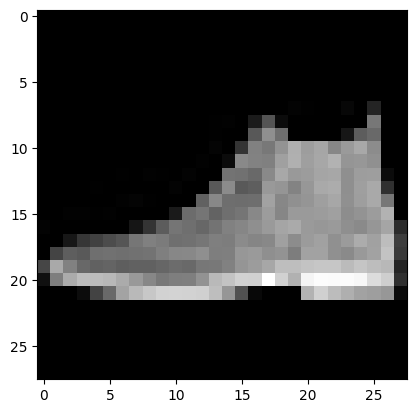

In [3]:
# Chargement des données
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Affichage des dimensions
print(x_train.shape)
print(x_test.shape)

# Visualisation d'une image
plt.imshow(x_test[0], cmap='gray')
plt.show()

# Normalisation et redimensionnement des données
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape(len(x_train), np.prod(x_train.shape[1:]))
x_test = x_test.reshape(len(x_test), np.prod(x_test.shape[1:]))


2.

## Construction et Interprétation d'un Autoencodeur (AE) en Keras

On construit un Autoencodeur (AE) utilisant la bibliothèque Keras. L'objectif de l'AE est de compresser et reconstruire les données tout en apprenant une représentation interne significative. Pour ce faire, nous avons défini un AE avec une couche d'encodage de dimension 64, utilisant les fonctions d'activation 'relu' pour l'encodage et 'sigmoid' pour le décodage.

Le modèle est constitué d'une couche d'entrée (`input_layer`) avec 784 caractéristiques, représentant les pixels d'une image de taille 28x28 pixels. La couche d'encodage (`encoder_layer`) réduit ces 784 caractéristiques à une dimension de 64 à l'aide d'une fonction d'activation 'relu'. Ensuite, la couche de décodage (`decoder_layer`) tente de reconstruire l'image originale avec 784 caractéristiques en utilisant une fonction d'activation 'sigmoid'.


In [4]:
from keras.layers import Input, Dense
from keras.models import Model

# Dimension de l'espace encodé
encoding_dim = 64

# Définir la couche d'entrée
input_layer = Input(shape=(784,))

# Couche de l'encodeur
encoder_layer = Dense(encoding_dim, activation='relu')(input_layer)

# Couche du décodeur
decoder_layer = Dense(784, activation='sigmoid')(encoder_layer)

# Ce modèle mappe une entrée à sa reconstruction
autoencoder = Model(input_layer, decoder_layer)

# Afficher le résumé du modèle
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 784)               50960     
                                                                 
Total params: 101200 (395.31 KB)
Trainable params: 101200 (395.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Le résumé du modèle affiche les différentes couches du modèle, indiquant le type de couche, la forme de sortie, et le nombre de paramètres entraînables.   * l'AE a un total de 101,200 paramètres (395.31 KB). Ces paramètres sont ajustés pendant l'entraînement du modèle pour minimiser la différence entre les images d'entrée et les reconstructions.

3.

## Compilation et Entraînement de l'Autoencodeur avec Données MNIST

On va compiler et entraîner l'autoencodeur construit précédemment en utilisant les données MNIST. L'autoencodeur a été compilé avec l'optimiseur **Adam** et la fonction de perte Mean Squared Error **(MSE)** pour mesurer la différence entre les images originales et leurs reconstructions.

Le processus d'entraînement a été réalisé sur les données d'entraînement avec un total de **10 époques**, et la performance du modèle a été évaluée sur les données de test à chaque époque. Les résultats affichent la diminution de la perte (loss) à chaque époque, tant pour les données d'entraînement que pour les données de validation. La perte de validation (val_loss) a également été observée pour évaluer la capacité du modèle à généraliser à de nouvelles données.

Les résultats obtenus montrent une diminution de la perte au fil des époques, indiquant que le modèle apprend à reconstruire les images avec une meilleure performance. La perte de validation suivant une tendance similaire suggère que le modèle généralise bien aux nouvelles données. Cependant, pour une évaluation complète de la performance, on va aussi visualiser les images reconstruites et de comparer visuellement les résultats.


In [5]:
# Compiler l'autoencoder
autoencoder.compile(optimizer='adam', loss='MeanSquaredError')

# Entraîner l'autoencoder
autoencoder.fit(x_train, x_train, epochs=10, validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0238 - val_loss: 0.0132
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0116 - val_loss: 0.0105
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0100 - val_loss: 0.0096
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0094 - val_loss: 0.0093
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0091 - val_loss: 0.0091
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0090 - val_loss: 0.0090
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0089 - val_loss: 0.0089
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.008

4.

## Reconstruction des Images par l'Autoencodeur
On va utiliser l'autoencodeur préalablement entraîné pour reconstruire les images de l'ensemble de test. Le code utilise la méthode `predict` de l'autoencodeur pour obtenir les reconstructions. Ensuite, à l'aide de la bibliothèque Matplotlib, nous avons comparé visuellement les cinq premières images originales avec leurs reconstructions.

La première rangée d'images affiche les exemples originaux, tandis que la deuxième rangée montre les images reconstruites par l'autoencodeur. L'évaluation visuelle de ces reconstructions permet d'apprécier la qualité du modèle.

313/313 [==============================] - 1s 2ms/step


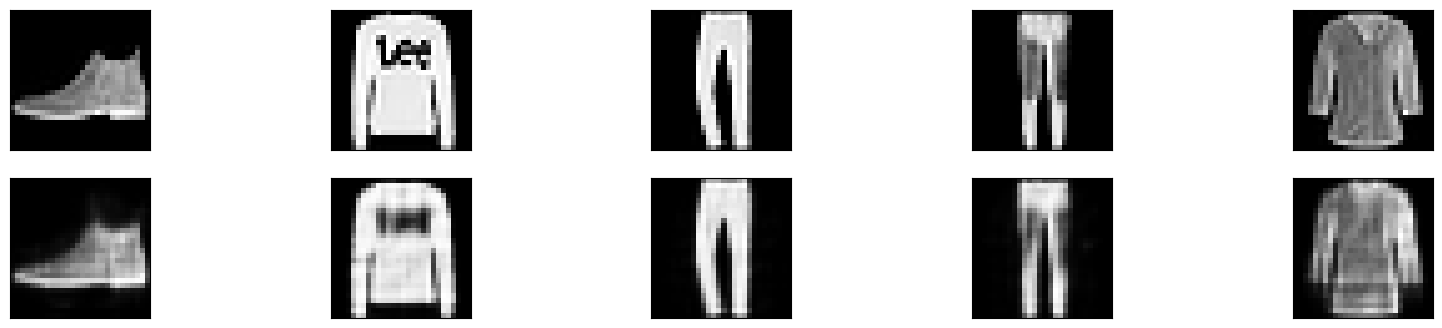

In [8]:
# Utiliser l'autoencodeur pour reconstruire les images
reconstructed_imgs = autoencoder.predict(x_test)

# Nombre d'images à afficher
n = 5
plt.figure(figsize=(20, 4))

for i in range(n):
    # Afficher les images originales
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Afficher les images reconstruites
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_imgs[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [9]:
from sklearn.metrics import mean_squared_error


# Calculer la MSE pour chaque paire d'images originale-reconstruite
mse_scores = [mean_squared_error(x_test[i].flatten(), reconstructed_imgs[i].flatten()) for i in range(len(x_test))]

# Afficher les scores MSE pour les cinq premières images
for i in range(5):
    print(f"MSE pour l'image {i+1}: {mse_scores[i]}")

MSE pour l'image 1: 0.003927296958863735
MSE pour l'image 2: 0.015367135405540466
MSE pour l'image 3: 0.002895177574828267
MSE pour l'image 4: 0.0038857508916407824
MSE pour l'image 5: 0.008887563832104206


Les valeurs de Mean Squared Error (MSE) qu'on a obtenu pour les cinq images semblent être relativement basses, ce qui suggère que l'autoencodeur a réussi à reconstruire ces images avec une faible erreur de reconstruction.

5.

## Comparaison de la Performance entre un Autoencodeur Simple et un Autoencodeur Profond

Nous avons créé et évalué deux autoencodeurs (AE) différents : un AE simple avec une couche d'encodage et une couche de décodage, et un AE profond avec trois couches intermédiaires symétriques de tailles 128, 64 et 128 respectivement. Les deux modèles ont été entraînés sur les mêmes données d'entraînement et évalués sur l'ensemble de test.

In [10]:
# Définition des dimensions des couches encodées
encoding_dim1 = 128
encoding_dim2 = 64
encoding_dim3 = 128

# Couche d'entrée
input_img = Input(shape=(784,))

# Couches de l'encodeur
encoded = Dense(encoding_dim1, activation='relu')(input_img)
encoded = Dense(encoding_dim2, activation='relu')(encoded)

# Couche codée (espace latent)
encoded = Dense(encoding_dim3, activation='relu')(encoded)

# Couches du décodeur
decoded = Dense(encoding_dim3, activation='relu')(encoded)
decoded = Dense(encoding_dim1, activation='relu')(decoded)

# Couche de sortie (reconstruction)
decoded = Dense(784, activation='sigmoid')(decoded)

# Modèle de l'autoencodeur
deep_autoencoder = Model(input_img, decoded)

In [11]:
deep_autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
# Entraîner l'autoencodeur profond
deep_autoencoder.fit(x_train, x_train, epochs=10, validation_data=(x_test, x_test))

# Utiliser l'autoencodeur profond pour reconstruire les images de test
reconstructed_imgs_deep = deep_autoencoder.predict(x_test)

Epoch 1/10
1875/1875 [==============================] - 16s 7ms/step - loss: 0.0244 - val_loss: 0.0169
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0151 - val_loss: 0.0140
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0132 - val_loss: 0.0128
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0120 - val_loss: 0.0120
Epoch 5/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0113 - val_loss: 0.0111
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0108 - val_loss: 0.0106
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0104 - val_loss: 0.0105
Epoch 8/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0101 - val_loss: 0.0100
Epoch 9/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0098 - val_loss: 0.0098
Epoch 10/10
313/313 [==============================] - 1s 2ms/step


In [13]:
# Calculer le MSE pour l'autoencodeur original
mse_original = np.mean(np.power(x_test - reconstructed_imgs, 2))

# Calculer le MSE pour l'autoencodeur profond
mse_deep = np.mean(np.power(x_test - reconstructed_imgs_deep, 2))

print(f'MSE for original AE: {mse_original}')
print(f'MSE for deep AE: {mse_deep}')

MSE for original AE: 0.008846326731145382
MSE for deep AE: 0.009693637490272522



Cependant, la performance d'un autoencodeur ne se limite pas uniquement à la valeur de MSE. L'inspection visuelle des images reconstruites et des différences est cruciale pour comprendre comment le modèle performe dans la reconstruction des détails spécifiques des images. Les images fournies montrent que les différences entre les images originales et reconstruites sont visibles mais ne sont pas extrêmement prononcées, ce qui indique que les deux modèles ont réussi à capturer les caractéristiques générales des données.

La légère augmentation du MSE pour le DAE pourrait être attribuable à plusieurs facteurs, tels que un besoin de régularisation plus forte pour contrer le surapprentissage dû à une capacité plus grande, ou peut-être que le modèle profond nécessiterait plus d'époques pour converger vers une meilleure solution. Il est également possible que le DAE capture des caractéristiques plus subtiles qui ne sont pas reflétées dans une mesure globale comme le MSE.

En conclusion, bien que le DAE n'ait pas significativement surpassé l'AE original en termes de MSE, il ne peut être jugé inférieur sans une analyse plus approfondie. Des expérimentations supplémentaires avec la régularisation, l'ajustement des hyperparamètres, et peut-être l'entraînement sur un plus grand nombre d'époques pourraient révéler le plein potentiel du DAE. La qualité de la reconstruction devrait également être évaluée dans le contexte de l'application spécifique pour laquelle l'autoencodeur est destiné, car différentes applications peuvent exiger une fidélité différente dans la reconstruction des images.

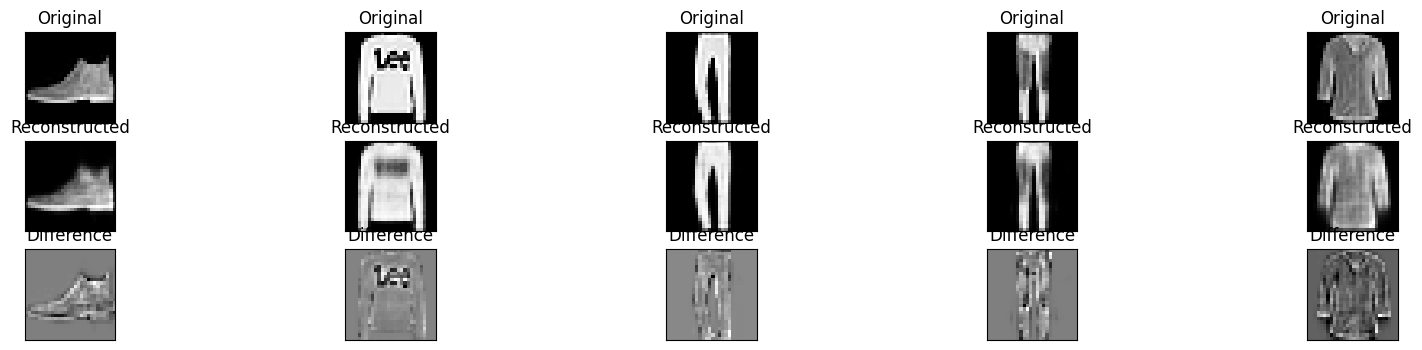

In [ ]:
import matplotlib.pyplot as plt


# Calcul des différences
differences = x_test - reconstructed_imgs_deep

# Nombre d'images à afficher
n = 5
plt.figure(figsize=(20, 4))

for i in range(n):
    # Afficher les images originales
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title('Original')

    # Afficher les images reconstruites
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(reconstructed_imgs_deep[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title('Reconstructed')

    # Afficher les différences
    ax = plt.subplot(3, n, i + 1 + n * 2)
    plt.imshow(differences[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title('Difference')

plt.show()

6.

In [14]:
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

# Dimension de l'entrée
input_img = Input(shape=(28, 28, 1)) # le '1' indique un seul canal (niveaux de gris)

# Architecture de l'encodeur
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Architecture du décodeur
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Modèle de l'autoencodeur convolutif
conv_autoencoder = Model(input_img, decoded)


In [15]:
conv_autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [16]:
# Notez que les données doivent être reformées pour avoir une dimension de canal.
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Entraîner l'autoencodeur convolutif
conv_autoencoder.fit(x_train, x_train, epochs=10, validation_data=(x_test, x_test))

# Utiliser l'autoencodeur convolutif pour reconstruire les images de test
reconstructed_imgs_conv = conv_autoencoder.predict(x_test)

Epoch 1/10
1875/1875 [==============================] - 127s 64ms/step - loss: 0.0127 - val_loss: 0.0076
Epoch 2/10
1875/1875 [==============================] - 121s 65ms/step - loss: 0.0066 - val_loss: 0.0059
Epoch 3/10
1875/1875 [==============================] - 118s 63ms/step - loss: 0.0053 - val_loss: 0.0049
Epoch 4/10
1875/1875 [==============================] - 120s 64ms/step - loss: 0.0046 - val_loss: 0.0044
Epoch 5/10
1875/1875 [==============================] - 121s 64ms/step - loss: 0.0043 - val_loss: 0.0042
Epoch 6/10
1875/1875 [==============================] - 121s 64ms/step - loss: 0.0040 - val_loss: 0.0040
Epoch 7/10
1875/1875 [==============================] - 122s 65ms/step - loss: 0.0039 - val_loss: 0.0038
Epoch 8/10
1875/1875 [==============================] - 122s 65ms/step - loss: 0.0037 - val_loss: 0.0037
Epoch 9/10
1875/1875 [==============================] - 120s 64ms/step - loss: 0.0036 - val_loss: 0.0036
Epoch 10/10
313/313 [==============================] - 

## Comparaison de Performance entre des Autoencodeurs de Différentes Architectures

In [17]:
# Calculer le MSE pour l'autoencodeur convolutif
mse_conv = np.mean(np.power(x_test - reconstructed_imgs_conv, 2))

print(f'MSE for original AE: {mse_original}')
print(f'MSE for deep AE: {mse_deep}')
print(f'MSE for conv AE: {mse_conv}')

MSE for original AE: 0.008846326731145382
MSE for deep AE: 0.009693637490272522
MSE for conv AE: 0.003581330878660083



Nous avons exploré trois architectures d'autoencodeurs (AE) pour la reconstruction d'images fashion MNIST : un AE simple, un AE profond, et un AE convolutif. Les résultats montrent que l'AE convolutif a surpassé les autres en termes de performance, avec une Mean Squared Error (MSE) d'environ 0.00358 sur les données de test. Cette amélioration peut être attribuée à la capacité des couches convolutionnelles à extraire efficacement les motifs locaux et les hiérarchies de caractéristiques dans les images.

En comparaison, l'AE simple a atteint une MSE d'environ 0.00885, tandis que l'AE profond a obtenu une MSE d'environ 0.00969. La différence significative dans les performances indique que l'architecture convolutive est mieux adaptée à la tâche de reconstruction d'images MNIST, permettant une extraction plus précise des caractéristiques. Les couches convolutionnelles agissent comme des filtres apprenables, capturant des motifs locaux, ce qui s'avère particulièrement avantageux pour les données d'images.

Il est important de souligner que l'efficacité d'un modèle dépend de la nature spécifique des données. Dans ce cas, l'AE convolutif a démontré une meilleure adaptabilité aux structures complexes des images MNIST, conduisant à des reconstructions plus fidèles par rapport aux modèles simples et profonds.